In [1]:
# Packages are installed on RStudio - not necessary for Kaggle but for reference shown below:
# install.packages("tidyverse")
# install.packages("ggplot2")
# install.packages("readr")
# install.packages("dplyr")
# install.packages("rmarkdown")

# Loading Libraries
library(tidyverse)
library(ggplot2)
library(readr)
library(dplyr)
library(rmarkdown)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Importing csv files
sleep_profile <- read.csv("../input/fitbitdatset/sleep_profile.csv")
activity_profile <- read.csv("../input/fitbitdatset/activity_profile.csv")
user_profile <- read.csv("../input/fitbitdatset/user_profile.csv")
calories_burned <- read.csv("../input/fitbitdatset/calories_burned.csv")
merged_tables <- read.csv("../input/fitbitdatset/merged_tables.csv")

## How can insights into Fitbit user data be applied to BellaBeats *'Ivy'* Health Tracker? 
<img src="https://bellabeat.com/wp-content/uploads/2021/09/1-Bellabeat-Ivy-Garden-Jet-Black.jpg" width="200" height="200" />
The purpose of which was to see if insights could be gained into the user data which could help open up new)The purpose of which was to see if insights could be gained into the user data which could help open up new opportunities for growth. In this instance, analysis was done with Bellabeats *'Ivy'* Health Tracker as the primary product to apply the insights to.

## Summary of Data Source:
This source of the Fitbit user data recommended to be used can be found at [Kaggle](https://www.kaggle.com/arashnic/fitbit). 

* _30 Fitbit Users_ consented to the submission of their personal tracker data
* Data included information on sleep monitoring, heart rate, total steps, distance etc.
* The range of the data was 2 months of individual readings.

## Summary of Data Cleaning:
The data files were originally imported into Google Sheets & cleaned there. The process:

* 77 Rows of data were deleted due to incomplete information
* Duplicates were removed
* Data types & column headings were adjusted to create consistency
* Standard data cleaning routines applied: removing duplicates, trimming
* The _sleepDay_merged_ table was joined with the _dailyActivity_ to be able to anyalyse the data more effectively. 

## Limitations of the data to consider:

* Relatively small sample size of less than 30 users.
* There were a few users in the study who had not worn their trackers at all, which can skew the results (they were ultimately deleted from the data sets)
* We don't know the gender or age of the users
* Results of analysis should just be a starting point for a deeper exploration into user habits

## Setting up the environment
Notes: seeting up the R environment by loading the following packages using RStudio:

 * tidyverse 
 * ggplot2 
 * readr 
 * dplyr 
 * rmarkdown 

*--Packages aren't loaded into Kaggle b/c they're already installed*
 

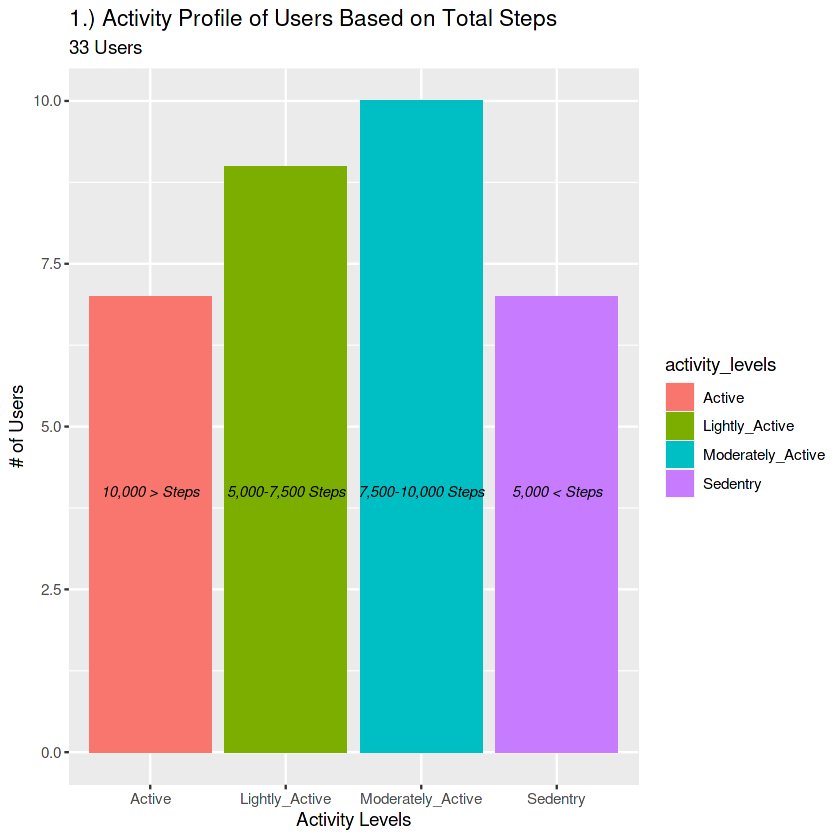

In [3]:
# Visualization Base on Total Steps
ggplot(data=activity_profile)+
  geom_bar(mapping=aes(x=activity_levels, fill=activity_levels))+
  labs(title="1.) Activity Profile of Users Based on Total Steps", subtitle = "33 Users", x="Activity Levels", y="# of Users")+
  annotate("text",x=1,label="10,000 > Steps",y=4,size=3,fontface="italic")+
  annotate("text", x=2, label="5,000-7,500 Steps", y=4, size=3, fontface="italic")+
  annotate("text", x=3, label="7,500-10,000 Steps", y=4, size=3, fontface="italic")+
  annotate("text", x=4, label="5,000 < Steps", y=4, size=3, fontface="italic")
  

* The _dailyActivity_ table was aggregated and filtered to categorize the activity levels of users
based on the average Total number of Steps for each user.
* A total of 33 users had data on their Total Steps.


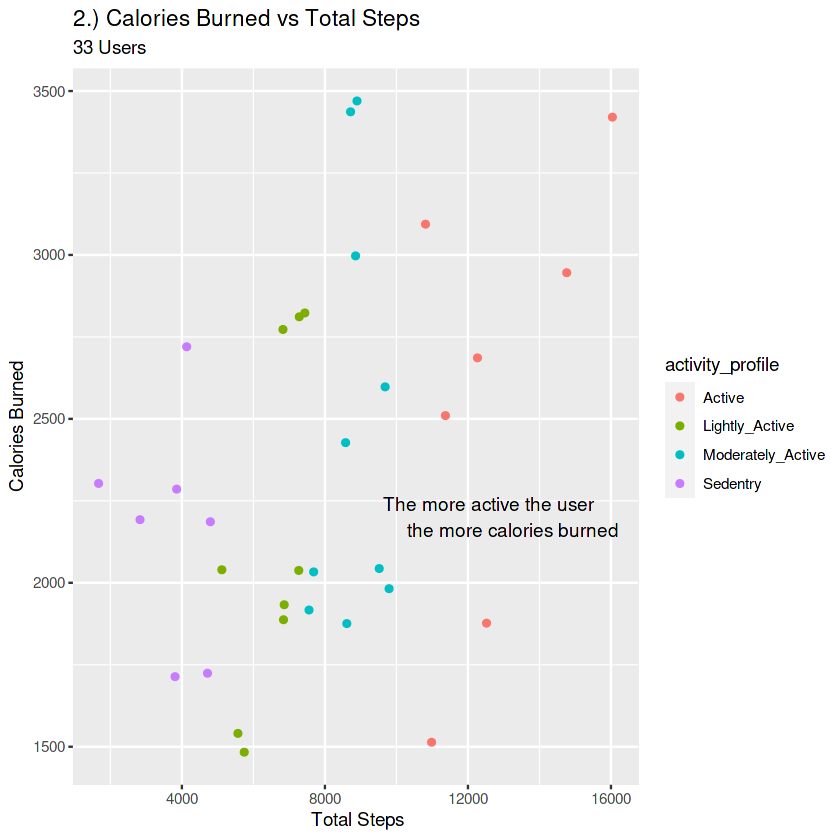

In [4]:
# Visualization of Calories Burned vs. Total Steps
ggplot(data=calories_burned)+
  geom_point(mapping=aes(x=TotalSteps, y=Calories, color=activity_profile))+
  labs(title="2.) Calories Burned vs Total Steps", subtitle="33 Users",
       x=" Total Steps", y="Calories Burned")+
  annotate("text", x=12500, y=2200, label=" The more active the user
           the more calories burned")

* Based on the table above the data shows that the more active the user the more
calories are burned.

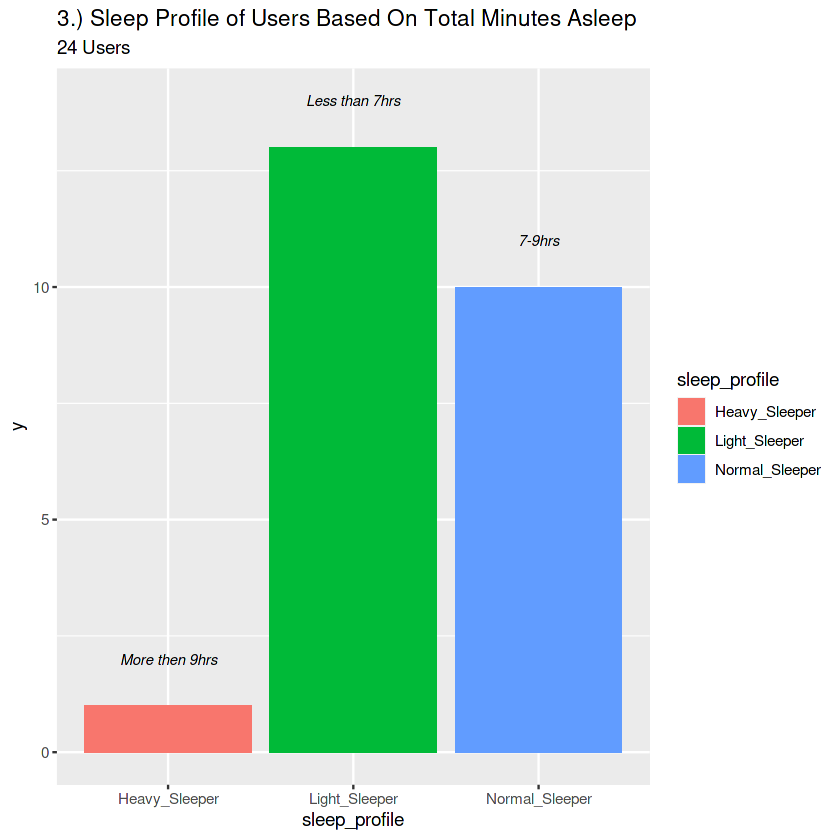

In [5]:
#Visualization of the sleep profile of users
ggplot(data=sleep_profile)+
  geom_bar(mapping=aes(x=sleep_profile, fill=sleep_profile))+
  labs(title="3.) Sleep Profile of Users Based On Total Minutes Asleep", subtitle = "24 Users")+
  annotate("text",x=3,label="7-9hrs",y=11,size=3,fontface="italic")+
  annotate("text",x=2,label="Less than 7hrs",y=14,size=3,fontface="italic")+
  annotate("text",x=1,label="More then 9hrs",y=2,size=3,fontface="italic")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 219 rows containing non-finite values (stat_smooth).”


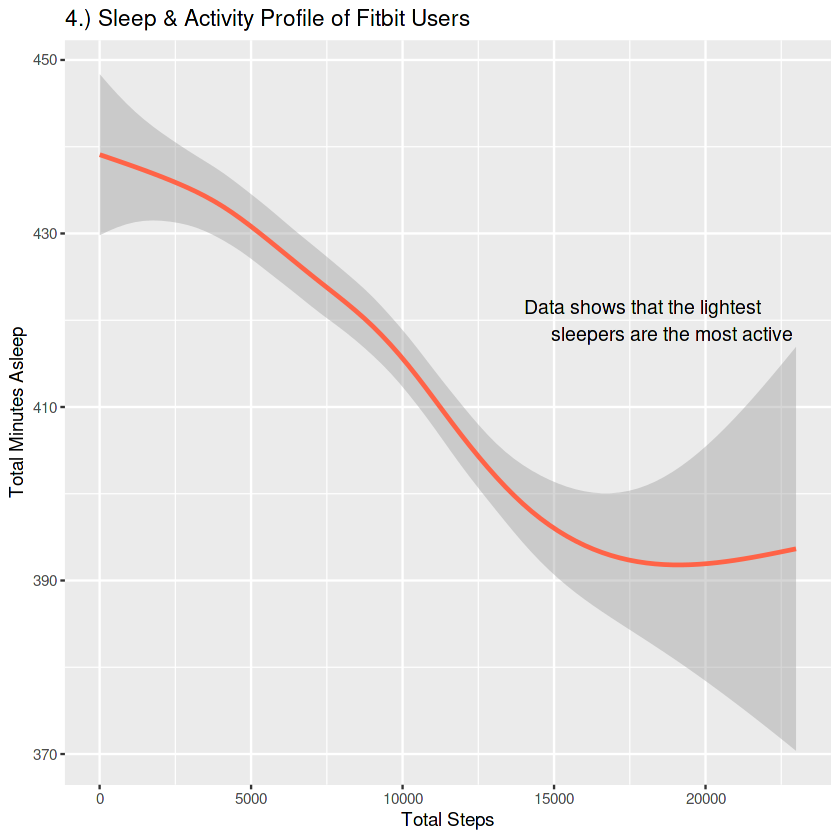

In [6]:
# Sleep vs Activity profile of users
ggplot(data=merged_tables)+
  geom_smooth(mapping=aes(x=TotalSteps, y=TotalMinutesAsleep), color="tomato")+
  labs(title="4.) Sleep & Activity Profile of Fitbit Users", x="Total Steps", y="Total Minutes Asleep")+
  annotate("text", x=18000, y=420, label="Data shows that the lightest 
           sleepers are the most active", size=4)


## Conclusions 
* The activity profile of the users are distributed fairly evenly across all profiles, with most users being moderately active.
* The more active the user was, the more calories they seemed to burn.
* There were more users getting less than 7hrs of sleep than any other sleep profile.
* The last data displays that the more active the user the less time spent sleeping.
* There were some instances where users inconsistently wore their trackers.

## Recommendations

* Consistency of use was also an issue, since the *Ivy Tracker* also monitors sleep, marketin campaigns should aslo be highliting the benefits of users understanding their sleep cycles by regularly wearing the device.
* In order for BellaBeat to encourage new and current customers to consistently wear their devices they can develop marketing campaigns to geared around challenges to reach certain activity levels by tracking their steps, having group competitions, users of the months etc. The goal would be to encourage users to increase their activity levels and the *Ivy Tracker* could help them to ensure they're meeting these goals. 
* Since the sleep data had to be merged with the daily activity table, it's likely that users had to wear more than one device, marketing could highlight the benefit of the convenience of wearing an all-in-one device that tracks multiple health data points.
* Considering the very small sample size I recommend that the company also conducts there own survey for their own users to find out amongst other things:
 * What made them choose their BellaBeat device?
 * Are they using their devices consistently?
 * What were their users hoping to accomplish based on the knowledge the devices give them about their own habits?
 * Are there additional health datapoints that they wanted to be able to measure? 

*Thanks for reading! And please if you see anything that could be improved upon, or any mistakes or recommendations, do leave a comment!*